# Determining correct thresholds with elbow method

In [10]:
import os
import json
import matplotlib.pyplot as plt
from kneed import KneeLocator

ANALYSIS_DATA_DIR = "threshold_analysis_data"

## Prepare data

Extract values from file

In [11]:
data = {}

i = 1    
for filename in os.listdir(ANALYSIS_DATA_DIR):
    if filename.endswith(".json"):  # Adjust for file format
        filepath = os.path.join(ANALYSIS_DATA_DIR, filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            sum_score = 0
            for project in projects:
                sum_score += project["bumpy_score"]
                
            data[i] = sum_score
        i += 1

print(data)

{1: 227, 2: 141, 3: 73, 4: 39, 5: 21, 6: 10, 7: 4, 8: 1, 9: 0}


Convert data

In [12]:
x = list(data.keys())  # Thresholds
y = list(data.values())  # Total alerts

## Plot elbow

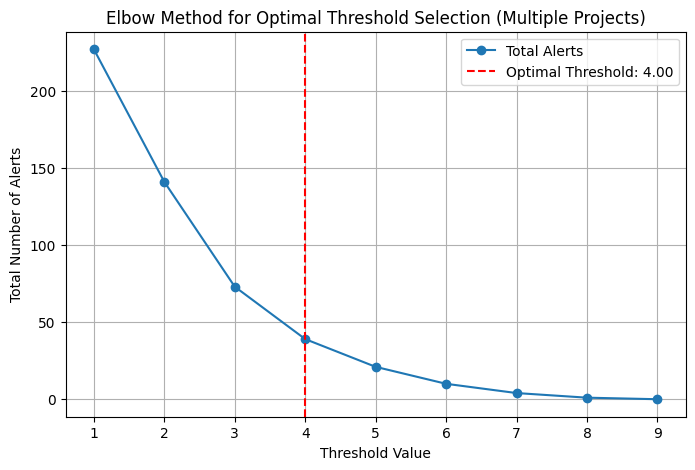

✅ Optimal threshold found: 4


In [13]:
# Find the elbow point
knee = KneeLocator(x, y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")